新型コロナウイルスの状況に影響を受けるバイオ・ヘルス株を統計的に分析します。

最初に準備をします。

Python3を用いてデータをダウンロードするためには、jupyter notebookとpandas-datareaderがお勧めです。jupyter notebookのインストールについては[Python3ではじめるシステムトレード：Jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)を参考にしてください。ここにpandas-datareaderのインストールの説明もあります。また、[Yahoo Finance USから株価をダウンロードしてみた](https://qiita.com/innovation1005/items/5be026cf7e1d459e9562)を参考にしてください。


In [1]:
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader.data as web #データのダウンロードライブラリ
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
#import datetime
#a=datetime.datetime.now()

# 短期の株価に影響を与える要素

- 治験の状況
- 企業の戦略の見直し・ファイナンス戦略の見直し
- 個人投資家の動き
- 大口投資家の動き
- 資金獲得状況

In [2]:
def ShorttermInvest(PORT,start='2010/1/4'):
    i=1
    for asset in PORT:
        tsd = web.DataReader(asset,"yahoo",start).dropna()#jpy
        ts=tsd.loc[:,'Adj Close']/tsd.iloc[0,5]
        ts.plot(label=str(asset))
        v=np.std(np.log(ts).diff())*np.sqrt(252)
        print(asset,adfuller((ts),regression='nc')[1:3],
          adfuller((ts),regression='c')[1:3],
          adfuller((ts),regression='ct')[1:3],
          adfuller((ts),regression='ctt')[1:3],v)
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()        

# 2020年のバイオ・ヘルス株の動き

RHHBY (0.811946137799602, 1) (0.30942615547228847, 1) (0.3220211353356668, 1) (0.5513302939730502, 1) 0.38504449524716516
PFE (0.6482962672774243, 1) (0.0645235864945026, 9) (0.18523311862999264, 9) (0.315496634828133, 9) 0.38749058745254766
NVS (0.5583686447100411, 2) (0.13467610165025196, 2) (0.3948103870388639, 2) (0.5477761778775136, 2) 0.3323036881273197
MRK (0.5458635448612557, 10) (0.09112990447475411, 9) (0.46179040107344754, 9) (0.17206740197627196, 9) 0.3690012852398665
GSK (0.47706122743974, 5) (0.1552393270171073, 5) (0.4400899847696595, 5) (0.6094296089633989, 5) 0.35687046969435654


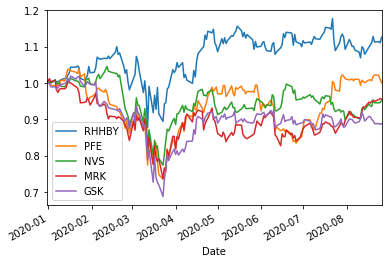

JNJ (0.7230430143415582, 9) (0.0585597119457908, 9) (0.12446790876009373, 9) (0.18341091948189497, 9) 0.3476385736968938
SNY (0.7372288841678856, 1) (0.44100189948214197, 9) (0.28646450813637997, 9) (0.6290915980291729, 9) 0.3486747201111218
ABBV (0.7488047929209422, 10) (0.623518646151443, 10) (0.46154321783211455, 12) (0.771831872434569, 12) 0.38799452370269444
TAK (0.6014160162220097, 2) (0.2875461854202449, 2) (0.5907161293412132, 2) (0.7673412591729605, 2) 0.39252048263673905
BMY (0.5708121325471311, 8) (0.10459407736004045, 9) (0.3737151446268847, 9) (0.48779877373237324, 9) 0.3192459990166295


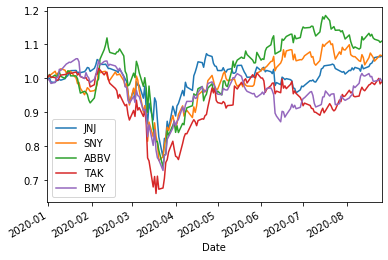

In [3]:
TOP10=['RHHBY','PFE','NVS','MRK','GSK','JNJ','SNY','ABBV','TAK','BMY']
ShorttermInvest(TOP10,'2020/1/1')

IBB (0.7604269961042831, 9) (0.6082888918537089, 9) (0.4499755975016993, 9) (0.8476348956304955, 9) 0.37040065471027805
XLV (0.6994999567699338, 9) (0.30122203072939424, 9) (0.33249366687090964, 9) (0.41530904399984164, 9) 0.35462749108997343


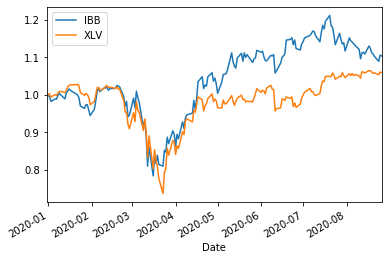

In [4]:
ETF=['IBB','XLV']
ShorttermInvest(ETF,'2020/1/1')

GILD (0.6972541495512711, 9) (0.4177614091578511, 9) (0.9745090193175501, 9) (0.1374063406911818, 11) 0.4400210072952052
VRTX (0.8103496039391536, 9) (0.5197847698900361, 9) (0.499506472750137, 9) (0.6557051579542991, 9) 0.46371723576491686
AMGN (0.7305564050993771, 9) (0.5167672519475187, 9) (0.03294613413303493, 12) (0.09910015229408436, 12) 0.42594458265397095
BIIB (0.5581600706916606, 9) (0.10900228870225298, 9) (0.08224661044693177, 9) (0.14484111447758236, 9) 0.5120038083080366
REGN (0.9693732136773923, 9) (0.6566488623784288, 9) (0.5688215332700192, 1) (0.03327520624529434, 2) 0.4670359365850366


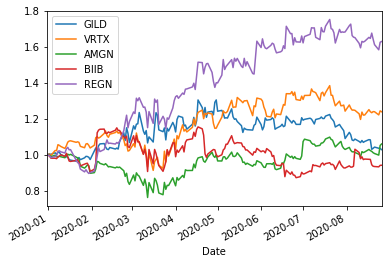

ILMN (0.7517908551686406, 9) (0.7250505978397338, 9) (0.5826423495981745, 9) (0.9856215720905096, 8) 0.4863181357830774
SGEN (0.8419178630353537, 0) (0.7051712712844975, 0) (0.7047150274938639, 0) (0.8437344770104152, 0) 0.4745238999883913
ALXN (0.5842338870493966, 0) (0.26093894779095844, 9) (0.3494128676154856, 9) (0.7613976399730276, 9) 0.41793815214024377
INCY (0.6968943206342108, 0) (0.6557596245502446, 0) (0.5091729400102473, 0) (0.5459427871628262, 0) 0.4414327599585027
MRNA (0.853909585603465, 0) (0.7239651148438297, 0) (0.22983501259511996, 0) (0.367587604473926, 0) 1.0584691410981335


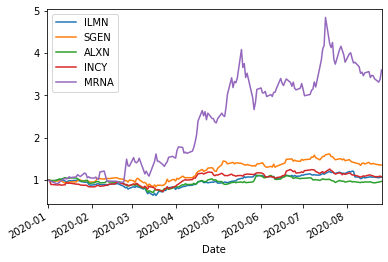

In [5]:
BIO10=['GILD','VRTX','AMGN','BIIB','REGN','ILMN','SGEN','ALXN','INCY','MRNA']
ShorttermInvest(BIO10,'2020/1/1')

JNJ (0.7230430143415582, 9) (0.0585597119457908, 9) (0.12446790876009373, 9) (0.18341091948189497, 9) 0.3476385736968938
UNH (0.7808251339267112, 8) (0.6704427034004119, 8) (0.6551801488855576, 8) (0.7390852278353224, 9) 0.5620503904931188
MRK (0.5458635448612557, 10) (0.09112990447475411, 9) (0.46179040107344754, 9) (0.17206740197627196, 9) 0.3690012852398665
PFE (0.6482962672774243, 1) (0.0645235864945026, 9) (0.18523311862999264, 9) (0.315496634828133, 9) 0.38749058745254766
ABBV (0.7488047929209422, 10) (0.623518646151443, 10) (0.46154321783211455, 12) (0.771831872434569, 12) 0.38799452370269444


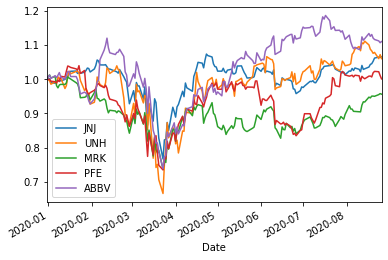

ABT (0.8431346972203477, 9) (0.6369107970743543, 9) (0.38944784167661073, 9) (0.40526396686823674, 9) 0.441200751696362
TMO (0.9609336329820448, 1) (0.9736025540873782, 1) (0.8354591132611426, 1) (0.6539942701346969, 1) 0.4037147815602653
BMY (0.5708121325471311, 8) (0.10459407736004045, 9) (0.3737151446268847, 9) (0.48779877373237324, 9) 0.3192459990166295
AMGN (0.7305564050993771, 9) (0.5167672519475187, 9) (0.03294613413303493, 12) (0.09910015229408436, 12) 0.42594458265397095
LLY (0.7603669231246639, 9) (0.4554854133143188, 9) (0.5350992614414007, 9) (0.705743785255666, 9) 0.4447727046474098


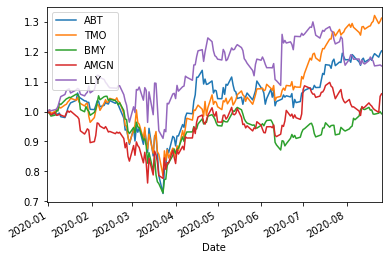

In [6]:
HLT10=['JNJ','UNH','MRK','PFE','ABBV','ABT','TMO','BMY','AMGN','LLY']
ShorttermInvest(HLT10,'2020/1/1')

### 直近の状況

最近(2020/7/23)よく動く個別株

|コード|銘柄|セクター|フルタイム従業員数
|:-:|:-:|:-:|:-:|
|ino|Inovio Pharmaceuticals, Inc. |Biotechnology|190
|vxrt|Vaxart, Inc.|Biotechnology|14
|codx|Co-Diagnostics, Inc. | Diagnostics & Research|22
|nvax|Novavax, Inc.   |Biotechnology|165
|ibio|iBio, Inc.|Biotechnology|55|
|tbio|Translate Bio, Inc. |Biotechnology|93
|htbx|Heat Biologics, Inc.|Biotechnology|35
|tnxp|Tonix Pharmaceuticals Holding Corp.|Biotechnology|16
|bntx|BioNtech SE|Biotechnology|1400
|arct|Arcturus Therapeutics Holdings Inc. | Biotechnology |88
|vir|Vir Biotechnology, Inc.|Biotechnology|237
|cydy|CytoDyn Inc. |Biotechnology|10
|gene|Genetic Technologies Limited |Diagnostics & Research|


ino (0.5204950364735113, 0) (0.3938358587956956, 1) (0.3647337261637889, 1) (0.5477459609108771, 1) 1.8866439596800761
vxrt (0.5204499298776905, 0) (0.628637798835109, 0) (0.2974637452308755, 4) (0.5997217869657101, 4) 2.244676608622388
nvax (0.3338858461767892, 13) (0.5800257558212606, 13) (0.3378282345158568, 13) (0.7783203812935748, 13) 1.7569830811569858
codx (0.5612641439716675, 1) (0.295489282045674, 0) (0.33384477305060095, 0) (0.18218993844955278, 0) 2.4258221883204425
ibio (0.2960818187348237, 3) (0.257835342290185, 3) (0.12755779163496023, 3) (0.3170121202718065, 3) 2.5637686321483772


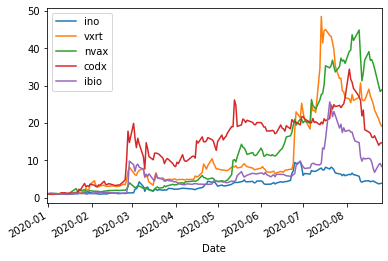

tbio (0.6620483090737617, 2) (0.44347357016090305, 2) (0.4044514089363899, 2) (0.4304286287279991, 2) 1.0229077842906906
htbx (0.36465303728203424, 2) (0.34926358086970066, 2) (0.11715140821494069, 2) (0.25224255822564917, 2) 1.9965797305210615
tnxp (0.2204456208186812, 0) (0.03599867992717271, 0) (0.13226711416952802, 0) (0.02396613887675652, 0) 2.3869430625951362
bntx (0.6963130747874993, 2) (0.4906866455829821, 2) (0.09758371624365897, 2) (0.27290277706467925, 2) 1.4359495515988447
arct (0.8842082453805367, 11) (0.8562571671829029, 11) (0.17512678137195098, 11) (0.4469620640364873, 11) 1.2992418291456078


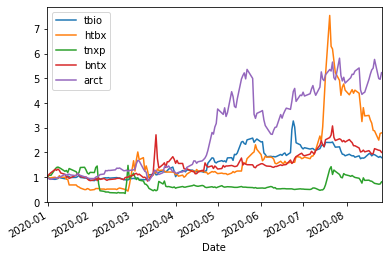

vir (0.6443663627506675, 0) (0.16165406674379174, 0) (0.06248391667391186, 0) (0.16367661150515384, 0) 1.5358306624880262
cydy (0.5931027127802035, 1) (0.45827683411298314, 2) (0.3416709212313469, 2) (0.585064882851098, 2) 1.6706445875470626
gene (0.6731578613640221, 3) (0.5430144093688127, 4) (0.8264944677904393, 4) (0.14766418113342877, 4) 1.9232963999925516


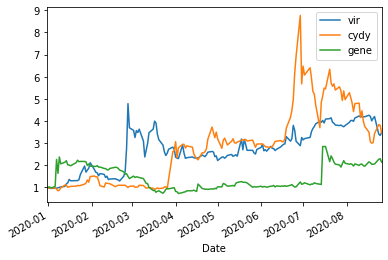

In [9]:
UPDATE=["ino","vxrt","nvax","codx","ibio","tbio","htbx","tnxp","bntx","arct","vir","cydy","gene"]
ShorttermInvest(UPDATE,'2020/1/1')

tmo (0.997844374958504, 3) (0.6597030960365504, 3) (0.3395392350484225, 3) (0.5126044631437215, 3) 0.37382909995941715
ebs (0.9669981973293593, 0) (0.8039203984121341, 0) (0.6623587829577997, 0) (0.6951520161339784, 0) 0.7376704613185003
isrg (0.9923706439873433, 4) (0.9291590736050236, 4) (0.41739183833973814, 4) (0.6222010287140486, 4) 0.4742711259782598
unh (0.9409878366110577, 5) (0.0538105050442524, 5) (0.01125071178525977, 0) (0.038218298631858216, 0) 0.4401311867803941


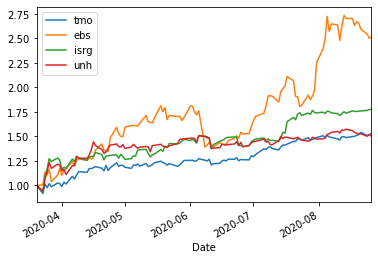

In [10]:
UPDATE=["tmo","ebs","isrg","unh"]
ShorttermInvest(UPDATE,'2020/3/21')

tmo (0.9609336329820448, 1) (0.9736025540873782, 1) (0.8354591132611426, 1) (0.6539942701346969, 1) 0.4037147815602653
arct (0.8842082453805367, 11) (0.8562571671829029, 11) (0.17512678137195098, 11) (0.4469620640364873, 11) 1.2992418291456078
tsla (0.9919829894735782, 3) (0.9928871515058504, 3) (0.965058025672386, 3) (0.2622837232430223, 3) 0.9376447115851305


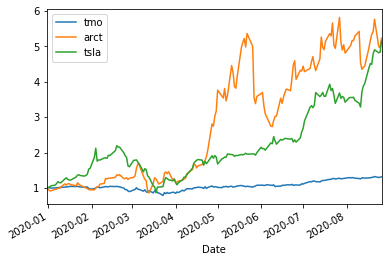

In [11]:
UPDATE=["tmo","arct","tsla"]
ShorttermInvest(UPDATE,'2020/1/1')

tmo (0.9945964143593489, 1) (0.04900598194438881, 1) (0.26794379954645314, 0) (0.1683194005112218, 0) 0.1998690583220394
arct (0.7684320337522182, 10) (0.17637498711232635, 10) (0.47788621189269054, 10) (0.9992630229886228, 8) 1.0752598796902704
tsla (0.9938828692780801, 0) (0.897182942969954, 0) (0.902209745020105, 0) (0.9894893761934667, 10) 0.772438367862569


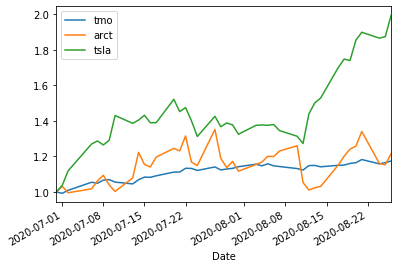

In [12]:
ShorttermInvest(UPDATE,'2020/7/1')

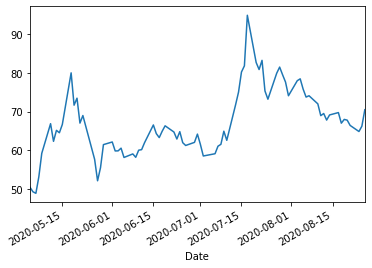

In [13]:
web.DataReader("mrna","yahoo","2020/5/4").Close.plot()

2020年1月、Modernaは、Gilead Sciences、Vaxart、Inovio Pharmaceuticals、Novavaxなどの他のバイオテクノロジー企業と競合して、COVID-19コロナウイルスを阻害するワクチン（mRNA-1273）の開発を発表しました。 Modernaのテクノロジーは、mRNA-1273という名前のメッセンジャーRNA（mRNA）化合物であり、ウイルス上のスパイク（S）タンパク質の形態をコードするSARS-CoV-2に対する阻害を提供します。Modernaの株式は劇的に上昇し、CEOやその他の企業幹部は、彼らの持ち株の大規模なプログラム販売を開始しました。

2020年3月に、ワクチン候補のフェーズIヒト試験が米国国立アレルギー感染症研究所との提携で始まりました。 4月、米国生物医学先端研究開発局（BARDA）は、Modernaのワクチン開発に最大4億8,300万ドルを割り当てました。 5月に開始する第II相投薬および有効性試験の計画は、FDAにより承認されました。将来の製造に備えて、ワクチンが承認された場合、Modernaはスイスのワクチン生産者であるLonza Groupとパートナーシップを締結しました.

2020年5月、株式市場に直接向けた第1フェーズ前段階の予備的な報告で、45人の候補者の8人だけの部分的で非ピアレビューの結果を発表した。その後、CEOはCNBCに、12億ドルの資金調達を発表した。そのときの時価総額は300億ドルである。元FDAの委員であるスコットゴットリーブは、「モデルナの道のりは長い」と述べ、CNBCの聴衆を和らげた。ウォールストリートジャーナルは「モデルナの株の取り扱いに注意を払う」[45]と続き、スタットは、「ワクチン専門家は、モデルナはCovid-19ワクチンの評価に重要なデータを公表していないと述べている」と報告した。

5月25日、ModernaはフェーズIIaの臨床試験を開始し、参加者600人を募集して、候補ワクチンであるmRNA-1273の抗体反応の安全性と違いを評価した。この研究は2021年に完了する予定。7月7日、ロイターは、臨床試験のデータ共有や、政府の要求手順を実行する際の会社の不本意をめぐって、モデルナと政府の研究者との間に論争があることを報告した。 7月9日、モデルナは、Laboratorios Farmacéuticos Roviにワクチンが承認された場合に備えて、その製造契約を発表した。

7月14日、モデルナの科学者は、COVID-19ワクチン候補であるmRNA-1273の第I相臨床試験の予備結果を発表し、ワクチン接種から15日後の接種用量に応じた抗体産生と、発熱、注射部位の疲労、頭痛、筋肉痛、痛みなどの軽度から中程度の副作用を示しました。結果は、2020年の後半に米国で第III相試験に100マイクログラム用量のmRNA-1273の使用を許容できると見なされました。

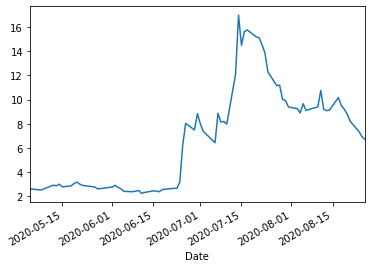

In [14]:
web.DataReader("vxrt","yahoo","2020/5/4").Close.plot()

バクサートによる主要なワクチンはインフルエンザ経口錠剤ワクチンであり、2015年の第I相臨床試験でインフルエンザウイルスに対する安全性と中和抗体反応を示している。2018年、バクサートはフェーズIIチャレンジ試験を完了しました。この試験では、バクサートインフルエンザタブレットワクチンは、注射用インフルエンザワクチンであるフルゾンによる27％の減少と比較して、プラセボと比較して39％の臨床疾患の減少を示した。

2020年1月、VaxartはCOVID-19を阻害する錠剤ワクチンの開発を発表しました。4月に、実験動物でCOVID-19のワクチン候補を用いた試験から陽性免疫応答を報告した。

2019年、複数のヘッジファンドがバクサートに投資した。最大の投資は、2520万株を取得したアーミスティスキャピタルである

2020年6月に、Vaxart COVID-19ワクチン候補が、Operation Warp Speedと呼ばれる米国COVID-19ワクチン開発プログラムに含まれた。

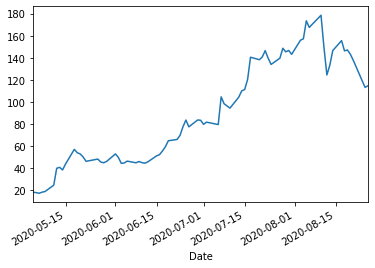

In [15]:
web.DataReader("nvax","yahoo","2020/5/4").Close.plot()

2018年、Novavaxは、Bill and Melinda Gates Foundationから予防接種用ワクチンの開発のために8,900万ドルの研究助成金を受け取った。

2020年5月、Novavaxは、同社のCOVID-19ワクチン候補（NVX-CoV2373）の健康な成人における初期段階の評価に資金を提供し、ワクチンが成功した場合には、大規模製造に備えてリソースを開発するために、 疫学準備イノベーション連合から3億8400万ドルを受け取りました。

CEPIはすでに3月に400万ドルを投資していました。

2020年1月、Novavaxは、SARS-CoV-2を阻害するためのNVX-CoV2373というワクチン候補の開発を発表した。 2020年3月、Novavaxは、ワクチン候補に関する前臨床および初期段階のヒト研究のためのEmergent BioSolutionsとの提携を発表しました。パートナーシップに基づき、Emergent BioSolutionsはボルチモアの施設でワクチンを製造する。 NVX-CoV2373という名前の候補者の最初の人間での安全性の研究は、オーストラリアで2020年5月に開始された。 7月、2021年までにコロナウイルスワクチン候補の開発を促進するため、オペレーションワープスピードから16億ドルを受け取った。Novavaxは、16億ドルが保健福祉省と国防総省の間の「協力」から生じたと発表した。

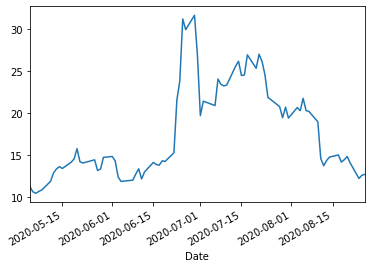

In [16]:
web.DataReader("ino","yahoo","2020/5/4").Close.plot()

2020年1月、疫病予防イノベーション連合（CEPI）は、SARS-CoV-2に対するワクチンの開発のために最大900万ドルをイノビオに供与すると発表した。イノビオは、CEPI、韓国国立衛生研究所、および国際ワクチン研究所とCOVID-19ワクチン候補を開発するためのパートナーシップを結んでいる。

イノビオは、中国のバイオテクノロジー企業である北京Advaccine Biotechnology Co. と協力して、中国の規制当局による承認を迅速化し、2020年の前半に中国でワクチン候補のヒト臨床試験を開始する計画をもつ。 予備的な有効性試験に成功した場合、ワクチン生産を拡大するために製造業者と提携している。 2020年4月、同社は米国でリードワクチン（INO-4800）のヒト第I相安全性試験、および韓国で第I-II相試験を開始し、COVID-19ウイルスに対する免疫化をテストした。

6月初旬に、イノビオは国際ワクチン研究所および韓国のソウル国立大学と提携し、ソウル大学病院で120人の参加者を対象に実施されるフェーズI-IIの安全性および有効性試験を進めました。 6月この研究は、疫病予防連合によって資金提供され、韓国疾病管理予防センターおよび韓国国立衛生研究所によってサポートされている。

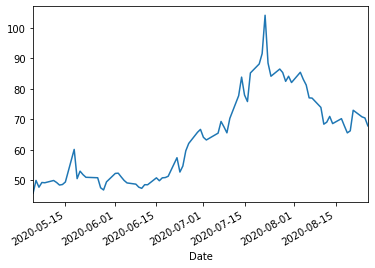

In [17]:
web.DataReader("bntx","yahoo","2020/5/4").Close.plot()

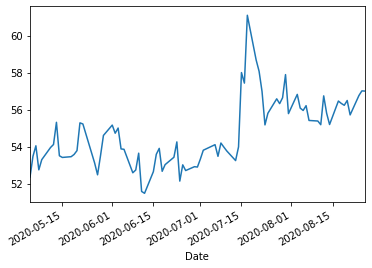

In [18]:
web.DataReader("azn","yahoo","2020/5/4").Close.plot()

4月、Pascal Soriotの最高経営責任者は、同社がGlaxoSmithKlineおよびケンブリッジ大学と協力して、1日あたり30,000のCovid-19テストを実行できる新しいラボを開発していると報告した。Covid-19の治療におけるカルクエンスの潜在的使用を評価する臨床試験の計画を発表した。

2020年6月、国立アレルギー感染症研究所（NIAID）は、オックスフォード大学とアストラゼネカによって開発された潜在的なワクチンのテストの第3フェーズが2020年7月に始まることを確認した。

2020年6月、さらに1億回分の投与量を英国のNHSで利用できるようにする.アストラゼネカとEmergent BioSolutionsは、特に米国市場向けにオックスフォード大学のアデノウイルスベースのCOVID-19ワクチンを製造するために8,700万ドルの契約を結んだ。この契約はトランプ政権のオペレーションワープスピードイニシアチブの一部である。

2020年6月13日、アストラゼネカは、フランス、ドイツ、イタリア、オランダで形成されたグループであるヨーロッパの包括的ワクチン同盟と、実験用COVID-19ワクチンの最大4億回分をすべてのEU加盟国に供給する契約を結んだ。

2020年7月、アストラゼネカはIQVIAと提携し、オックスフォード大学で開発されたCOVID-19ワクチンAZD1222の米国での臨床試験を迅速化した。

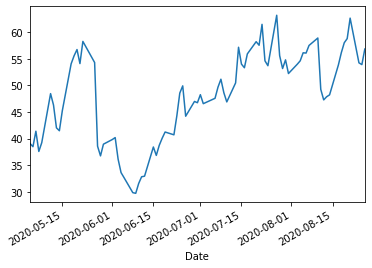

In [19]:
web.DataReader("arct","yahoo","2020/5/4").Close.plot()

アルクトゥルスセラピューティクスは、RNAに焦点を当てた希少疾患の治療法の発見、開発、商品化に焦点を当てたアメリカのバイオテクノロジー企業だ。 
LUNAR®と呼ばれる、強力で安全な新しいRNA治療プラットフォームを開発している。LUNAR®は、小干渉RNA、メッセンジャーRNA、遺伝子編集、DNA、アンチセンス、マイクロRNAオリゴセラピューティクスなどのRNA医薬品向けの独自の脂質対応デリバリーシステムである。 同社のパイプラインには、オルニチントランスカルバミラーゼ欠損症（OTCD）などの希少疾患や、嚢胞性線維症などの呼吸器疾患に対するRNA治療法が含まれる。 ワクチン医薬品にはCOVID-19のワクチン候補が含まれ、COVID-19の大流行に対応して、デュークNUSメディカルスクールと提携し、STARRTMテクノロジーを使用してCOVID-19ワクチンを開発している。ヒトでのLUNAR-COV19臨床試験は2020年7月に始まった。

# 治験の状況(2020/7/16)
## ワクチンの治験
出所：https://www.raps.org/news-and-articles/news-articles/2020/3/covid-19-vaccine-tracker
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/9c72e1a9-1af0-0e97-fa1f-e94a7afd6fbe.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/a7392b75-1417-5188-2c29-3fc69b842e17.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/4cccea4d-7bd1-69db-fe78-0d7d8341d2ea.png)


## 治療薬の治験

出所：https://www.raps.org/news-and-articles/news-articles/2020/3/covid-19-therapeutics-tracker

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/92507f64-c146-4953-1d13-58e0a2355fea.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/bcb854ed-6fd5-855a-6dec-68b4d8916b57.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/6993b5ac-96e2-a91f-ca16-31bb7dd2d313.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/dac94b00-ec03-f3cf-aac4-3fe69121a157.png)



# 第2波の察知(2020/7/17)

[COVID-19：第2波をオンラインダッシュボードで察知](https://qiita.com/innovation1005/items/f45a51fe4f541c91ec99)
# その他まとめ

|コード|配当|出資・援助|活動拠点|その他
|:-:|:-:|:-:|:-:|:-:|
|ADPT| ||米国
|ALNY|||米国
|ALT|||米国
|AMGN|2.85%||米国
|AZN|2.53%||英国
|BIIB|||米国
|BNTX||PFE|ドイツ
|CYDY|||米国
|EBS|||米国
|GILD|3.68%||米国|EUA
|GSK|4.60%|BARDA|米国
|HTBX|||米国
|INO||CEPI,Bill&Melinda Gates Foundation|米国|治験
|JNJ|2.75%|BARDA|米国|治験、複製ウイルス運び屋型
|MRK|3.19%||米国|イベルメクチン治療薬
|MRNA||CEPI,BARDA|米国|治験
|NVAX| |CEPI,EBS|米国
|PFE|4.08%||米国
|REGN|||米国
|RHHBY|2.56%|BARDA|スイス
|SNY|3.58%|BARDA|フランス|治験、抗厚性補助遺伝子組み換え型
|TBIO|||米国
|VIR||Bill&Melinda Gates Foundation|米国
|Sinovax|||中国
|CanSino|||中国
|Medicago||||(田辺三菱製薬)

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/45864560-d5e0-48ed-ed54-d571201ecc93.png)
https://investors.vaxart.com/stock-information/ownership-profile

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/d84a013c-196c-512d-62f8-43d40d96c1a7.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/00c12a3f-2470-03f4-ca22-25cee98546de.png)
https://www.nasdaq.com/market-activity/stocks/ino/institutional-holdings
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/70db36b8-2a09-6b1a-c3ac-df437497cdb3.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/c14a9b38-6f8f-aefd-9bb7-dd838e4c97e1.png)
https://www.nasdaq.com/market-activity/stocks/tbio/institutional-holdings
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/dc3ec07b-3f67-bc44-1313-90130afaf433.png)
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/e235d46e-5c9e-b8fe-f75a-06efa43fdb26.png)
https://www.nasdaq.com/market-activity/stocks/nvax/institutional-holdings
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/f82319c8-abf4-7298-14b0-6bc4eefd044e.png)

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/0039f52e-3078-ea00-305e-ddbc74cdb45e.png)
https://www.nasdaq.com/market-activity/stocks/mrna/institutional-holdings


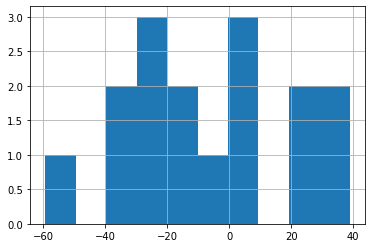

In [35]:
tsd = web.DataReader('nvax',"yahoo",'2020/7/23').dropna()#jpy
ror=tsd.Close.diff(10)
ror.hist()

In [29]:
tsd.iloc[0]

High         1.475000e+02
Low          1.331900e+02
Open         1.360000e+02
Close        1.464500e+02
Volume       6.143100e+06
Adj Close    1.464500e+02
Name: 2020-07-22 00:00:00, dtype: float64

7月23日
NVAXの個別株Option売りがメチャクチャおいしいんですよ。
例えば7月24日限のStrike$130のオプションを今日1単位売る。
7月24日までに$130まで下がらなければ7月24日締めで$990ドルゲット。
（7月24日までの途中段階で反対売買すればTime Decayの分はもらえる）

もし$130まで下がれば、7月24日締めで$130で100株買うことになる。
（安い価格で購入できる。その場合でも$990はゲットできる）
購入するのが嫌なら反対売買することもできる。

$130で100株購入するための資金$130,000は口座で7月24日までロックされるが
約10日間で7.6%の利益が得られる。


In [31]:
130*100

13000

In [34]:
990/13000

0.07615384615384616

In [36]:
990/100

9.9